In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Set testing interval
interval=100000

#Return list of Ys using different values of X, where X<=rpr
def solve(rpr,rer,m):
    def condition_function(x):
        global interval
        if 1.03 > x/rer > 1:
            return (1 + x/100) * (1 - m * (x/rer - 1))
        elif x/rer < 1:
            return 1 + x/100
        elif x/rer > 1.03:
            return (1 + x/100) *(1-(0.03*m))
    x = np.linspace(0, math.ceil(rpr), math.ceil(rpr)*interval)[:-math.ceil((math.ceil(rpr)-rpr)*interval)]
    y = [condition_function(i) for i in x]
    return x, y, rpr

#Plot X & Y values
def plot(x,y,rpr):
    plt.plot(x, y)
    plt.xlabel('r')
    plt.ylabel('Revenue')
    plt.grid(True)
    
    #Add annotation on figure
    def annot_max(x,y, ax=None):
        xmax = x[np.argmax(y)]
        ymax = max(y)
        text= "x={:.5f}, y={:.5f}".format(xmax, ymax)
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
        kw = dict(xycoords='data',textcoords="axes fraction",
                  arrowprops=arrowprops, bbox=bbox_props, ha="left", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=(1,1), **kw)
    annot_max(x,y)
    plt.axvline(x = rpr, color = 'r', linestyle = '-', label = f'x={rpr}')
    plt.legend(bbox_to_anchor = (0.5, 1), loc='upper right')
    plt.show()

#If the best X that can maximize Y is significantly lower than rpr (assuming the difference > 0.0001), 
#Then the hospital is considered incentivized
def incentivize(y,rpr,interval):
    if rpr-(y.index(max(y))/interval)>0.0001:
        return True
    else: return False


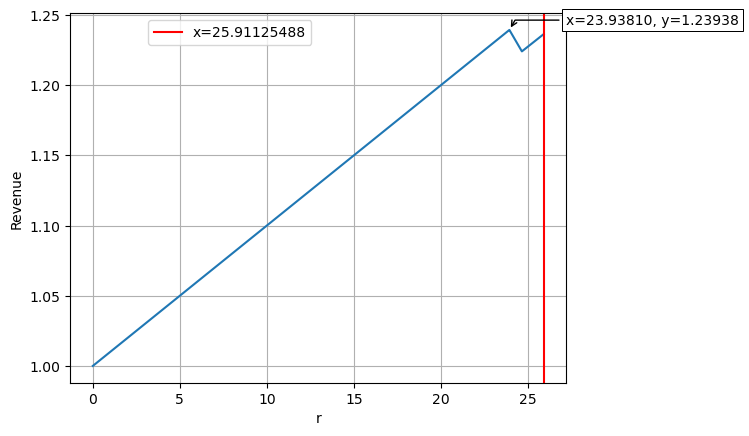

In [27]:
#Hospital 1
plot(*solve(25.91125488, 23.9381, 0.601114273))

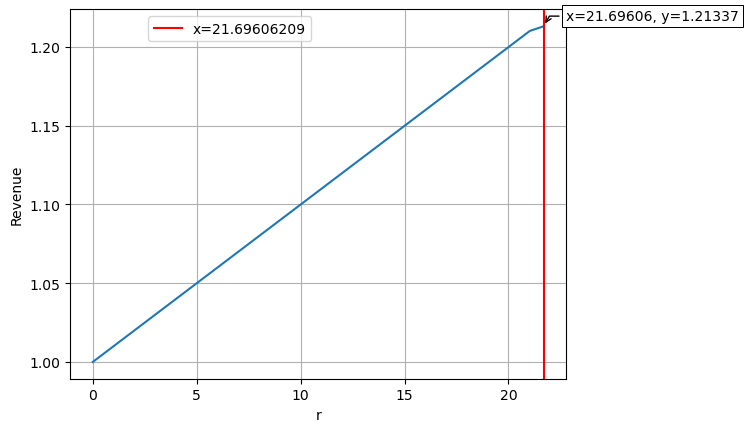

In [28]:
#Hospital 2
plot(*solve(21.69606209, 21.01259804,0.098346017))

In [41]:
import pandas as pd
#import data
df=pd.read_csv('Data.csv')

#Generate scalar of incentivized hospitals and add to df
incentivized=[]
for i in range(len(df)):
    incentivized.append(incentivize(*solve(df['RPR'][i],df['RER'][i],df['MedicareFr'][i])[1:], interval))
df['Incentivize']=incentivized

In [43]:
#Total incentivized hospitals
sum(df['Incentivize'])

65

In [44]:
# % of hospitals incentivized
sum(df['Incentivize'])/len(df)

0.3551912568306011

In [45]:
df.to_csv('updateddata.csv', index=False)  

In [47]:
df.head(10)

,County,HospitalID,MedicareFr,RPR,RER,Incentivize
0,Alameda,50002,0.385420,24.126127,22.505701,False
1,Humboldt,50006,0.463131,16.193045,19.058270,False
2,San Mateo,50007,0.302269,20.862410,20.750566,True
3,Napa,50009,0.430666,20.507330,22.007002,False
4,Napa,50013,0.487894,20.139364,21.881418,False
5,San Luis Obispo,50016,0.446989,19.723122,19.851444,False
6,Sacramento,50017,0.314865,19.069731,19.543978,False
7,Los Angeles,50018,0.302417,24.074648,24.114084,False
8,Riverside,50022,0.272430,21.809946,22.240143,False
9,San Diego,50024,0.498079,24.792191,24.788952,True
